# Practica 40 Limpieza de datos con pandas sobre archivos JSON  
## Responder las preguntas propuestas.  
### Aquellas preguntas que ya están respondidas debe explicar el código.

**El archivo JSON `allcandidatenewssample.json` contiene información sobre noticias y artículos relacionados con varias figuras políticas y eventos de campaña. Cada entrada en el JSON representa un artículo o noticia y contiene los siguientes campos:**

`title`: El título del artículo.  

`url`: La URL del artículo.  

`source`: La fuente del artículo, es decir, el medio de comunicación que lo publicó.  

`time`: La hora o tiempo relativo en que se publicó el artículo.  

`date`: La fecha de publicación del artículo en formato de marca de tiempo (timestamp).  

`query`: El tema o figura política relacionada con el artículo.  

`story_position`: La posición de la historia (en una lista de noticias o resultados).  

`panel_position`: La posición en un panel (en la presentación en una página web).  

`domain`: El dominio de la fuente del artículo.  

`category`: La categoría del artículo.  

**Este archivo almacena metadatos sobre varios artículos de noticias políticos, permitiendo análisis sobre la cobertura mediática, la frecuencia de artículos sobre ciertos temas o figuras políticas, y la distribución de fuentes de noticias.**


In [6]:
import pandas as pd
import numpy as np
import json
import pprint
import matplotlib as plt
from collections import Counter

## Análisis con Python clásico  
**Explicar aquellos códigos cuyas preguntas que ya están resueltas**

### Cargar los datos JSON y buscar posibles problemas  
**Utilice el método `json.load` para devolver datos sobre noticias sobre candidatos políticos. `load` devuelve una lista de diccionarios**

In [7]:
with open('allcandidatenewssample.json') as f:
  candidatenews = json.load(f)

with open('allcandidatenewssample.json') as f:
- Se abre el archivo 'allcandidatenewssample.json' y el objeto se asigna a la variable 'f' para referirse al archivo dentro del bloque 'with'
- candidatenews = json.load(f): Esta función lee el contenido del archivo abierto 'f'.

### Utilice `len` para obtener el tamaño de la lista, que en este caso es el número total de noticias. (Cada elemento de la lista es un diccionario con claves para el título, la fuente, etc., y sus respectivos valores).

In [8]:
len(candidatenews)

60000

len(candidatenews)
- Devuelve la cantidad de elementos de la lista de la variable 'candidatenews' que contiene el objeto Python cargado desde el archivo JSON

### Utiliza pprint para mostrar los dos primeros diccionarios:

In [9]:
pprint.pprint(candidatenews[0:2]) 

[{'date': '2019-12-25 10:00:00',
  'domain': 'www.nbcnews.com',
  'panel_position': 1,
  'query': 'Michael Bloomberg',
  'source': 'NBC News',
  'story_position': 6,
  'time': '18 hours ago',
  'title': 'Bloomberg cuts ties with company using prison inmates to make '
           'campaign calls',
  'url': 'https://www.nbcnews.com/politics/2020-election/bloomberg-cuts-ties-company-using-prison-inmates-make-campaign-calls-n1106971'},
 {'date': '2019-11-09 08:00:00',
  'domain': 'www.townandcountrymag.com',
  'panel_position': 1,
  'query': 'Amy Klobuchar',
  'source': 'Town & Country Magazine',
  'story_position': 3,
  'time': '18 hours ago',
  'title': "Democratic Candidates React to Michael Bloomberg's Potential Run",
  'url': 'https://www.townandcountrymag.com/society/politics/a29739854/michael-bloomberg-democratic-candidates-campaign-reactions/'}]


pprint.pprint(candidatenews[0:2]) 
- pprint(candidatenews[0:2]) es una función del Modulo 'pprint', que se utiliza para imprimir estructuras de datos complejas de una manera legible y ordenada
- El slicing [0:2], garantiza que se imprima desde el índice '0' al ìndice '2' sin incluir el índice '2', es decir, muestra los dos primerso elementos de la lista que son dos 
  diccionarios.

### Obtenga el valor de la clave de origen ('source') para el primer elemento de la lista:

In [10]:
pprint.pprint(candidatenews[0]['source'])

'NBC News'


- candidatenews[0]
Accede al primer elemento de la lista de
- ['source']
Accede al valor asociado a la clave 'source'

## Comprobar si existen diferencias en la estructura de los diccionarios.  
### Utiliza `counter` para comprobar si hay algún diccionario en la lista con menos, o más, de los 9 pares `clave:valor` normales. Mira algunos de los diccionarios que casi no tienen datos (los que sólo tienen dos claves) antes de eliminarlos. 

In [11]:
Counter([len(item) for item in candidatenews])

Counter({9: 57202, 2: 2382, 10: 416})

- [len(item) for item in candidatenews]
Esta compresión de la lista lee con 'item' cada diccionario (elementos de la lista 'candidatenews') y totaliza con 'len()' la cantidad de elementos del diccionarios item (pares clave-valor) y genera al final una lista con el total de 'clave-valor' por diccionarios de la lista 'candidatenews'
-Counter(): Toma cada elemento de la lista generada y devuelve un diccionario, donde la 'clave' es un 'valor en la lista' (resultado de la compresion de lista) y el 'valor' es el numero total de veces que se repite ese valor (frecuencia).

In [12]:
pprint.pprint(next(item for item in candidatenews if len(item)<9))

{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'}


- pprint.pprint(next(item for item in candidatenews if len(item)<9))
Imprime la primera ocurrencia ('next') de un diccionario que len(item)<9

In [13]:
pprint.pprint(next(item for item in candidatenews if len(item)>9))

{'category': 'Satire',
 'date': '2019-08-21 04:00:00',
 'domain': 'politics.theonion.com',
 'panel_position': 1,
 'query': 'John Hickenlooper',
 'source': 'Politics | The Onion',
 'story_position': 8,
 'time': '4 days ago',
 'title': '‘And Then There Were 23,’ Says Wayne Messam Crossing Out '
          'Hickenlooper Photo \n'
          'In Elaborate Grid Of Rivals',
 'url': 'https://politics.theonion.com/and-then-there-were-23-says-wayne-messam-crossing-ou-1837311060'}


- pprint.pprint(next(item for item in candidatenews if len(item)>9))
Imprime la primera ocurrencia ('next') de un diccionario que len(item)>9

In [14]:
pprint.pprint([item for item in candidatenews if len(item)==2][0:10])

[{'date': '2019-09-11 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-07-24 00:00:00', 'reason': 'No Top stories'},
 {'date': '2019-08-19 20:00:00', 'reason': 'Not collected'},
 {'date': '2019-09-13 16:00:00', 'reason': 'Not collected'},
 {'date': '2019-10-16 20:00:00', 'reason': 'No Top stories'},
 {'date': '2019-10-17 18:00:00', 'reason': 'Not collected'},
 {'date': '2019-08-02 14:00:00', 'reason': 'Not collected'},
 {'date': '2019-05-27 12:00:00', 'reason': 'Not collected'},
 {'date': '2019-12-03 12:00:00', 'reason': 'No Top stories'},
 {'date': '2019-01-03 00:00:00', 'reason': 'No Top stories'}]


- pprint.pprint([item for item in candidatenews if len(item)==2][0:10])
Primero se genera una lista de los diccionarios que tienen solo dos pares de 'clave-valor', 
con [item for item in candidatenews if len(item)==2] y luego se imprimen los primeros '10' elementos de la lista ([0:10])


### Confirme que la lista de diccionarios restante tiene la longitud esperada: 60000-2382=57618:

In [15]:
candidatenews = [item for item in candidatenews if len(item)>2]
len(candidatenews)

57618

- candidatenews = [item for item in candidatenews if len(item)>2]
Genera una lista con los diccionarios que tienen mas de '2' pares de clave-valor
- len(candidatenews)
Determina la longitud de la lista.

## Generar recuentos a partir de los datos JSON.  
### Obtenga los diccionarios sólo para `Político` (un sitio web que cubre noticias políticas) y muestre un par de diccionarios:

In [16]:
politico = [item for item in candidatenews if item.get("source") == "Politico"]
len(politico)

2732

- politico = [item for item in candidatenews if item.get("source") == "Politico"]
Se guarda en la variable 'politico' una lista de diccionarios donde la clave 'source' se igual a "Politico"
- len(politico): Determina la cantidad de diccionarios con la condición anteior

In [17]:
pprint.pprint(politico[0:2])

[{'date': '2019-05-18 18:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Marianne Williamson',
  'source': 'Politico',
  'story_position': 7,
  'time': '1 week ago',
  'title': 'Marianne Williamson reaches donor threshold for Dem debates',
  'url': 'https://www.politico.com/story/2019/05/09/marianne-williamson-2020-election-1315133'},
 {'date': '2018-12-27 06:00:00',
  'domain': 'www.politico.com',
  'panel_position': 1,
  'query': 'Julian Castro',
  'source': 'Politico',
  'story_position': 1,
  'time': '1 hour ago',
  'title': "O'Rourke and Castro on collision course in Texas",
  'url': 'https://www.politico.com/story/2018/12/27/orourke-julian-castro-collision-texas-election-1073720'}]


pprint.pprint(politico[0:2]): Imprime en forma legible los dos primeros diccionarios (elementos de la lista) de la lista 'politicos'

## Obtenga los datos de `source` y confirme que tienen la longitud prevista.  
### Mostrar los primeros elementos de la nueva lista sources. 

In [18]:
sources = [item.get('source') for item in candidatenews if 'source' in item]
for i, source in enumerate(sources[:5]):  
    print(f"{i + 1}: {source}")
print()
print('TIPO DE DATO DE sources')
print('-----------------------')
type(sources)


1: NBC News
2: Town & Country Magazine
3: TheHill
4: CNBC.com
5: Fox News

TIPO DE DATO DE sources
-----------------------


list

- sources = [item.get('source') for item in candidatenews if 'source' in item]
. Almacena en la variable 'sources' una lista que se genera con una 'compresión de listas', donde 'item' es igual a todos los pares 'clave-valor' siempre y cuando
la palabra 'source' se encuentre en ese par 'clave-valor'

- item.get('source'): Guarda en la lista el valor correspondiente a la clave 'source' 

- for i, source in enumerate(sources[:5]):  
    print(f"{i + 1}: {source}")
Imprime los '5' primeros elementos de la lista 'sources'   

- print('TIPO DE DATO DE sources')
print('-----------------------')
type(sources)
Muestra en pantalla el tipo de la variable 'sources'

In [19]:
len(sources)

57618

In [20]:
sources[0:5]

['NBC News', 'Town & Country Magazine', 'TheHill', 'CNBC.com', 'Fox News']

### Generar un recuento de noticias por fuente y muestra las 10 fuentes más populares. Observe que las noticias de The Hill pueden tener TheHill (sin espacio) o The Hill como valor para la fuente :

In [21]:
pprint.pprint(Counter(sources).most_common(10))

[('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('TheHill', 2383),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('The Hill', 1342),
 ('New York Post', 1275),
 ('Vox', 941)]


Counter(sources): Es una clase en Python, se usa para contar frecuencia de elementos de un iterable, como una lista, generalmente devuelve el resultado en un diccionario,
pero ,el método 'most_common(10)' devuelve la lista em forma de 'tuplas'. cad tupla contiene un elemento y su frecuencia.

## Corrige cualquier error en los valores del diccionario.

### Corrige los valores de la 'source' `The Hill` . Observe que `The Hill` es ahora la fuente fuente más frecuente de noticias:

In [22]:
for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
sources = [item.get('source') for item in candidatenews]
pprint.pprint(Counter(sources).most_common(10))

[('The Hill', 3725),
 ('Fox News', 3530),
 ('CNN.com', 2750),
 ('Politico', 2732),
 ('The New York Times', 1804),
 ('Washington Post', 1770),
 ('Washington Examiner', 1655),
 ('New York Post', 1275),
 ('Vox', 941),
 ('Breitbart', 799)]


- for newsdict in candidatenews:
    newsdict.update((k, "The Hill") for k, v in newsdict.items()
                    if k == "source" and v == "TheHill")
Por cada diccionario de la lista 'candidatenews' si k="source" y v="TheHill", entonces sustituye el valor de 'TheHill' por 'The Hill',
esto lo hace con el método 'update' que se le aplica a cada diccionario 'newsdict'

- sources = [item.get('source') for item in candidatenews]
Se genera una lista con los valores de la clave 'source' de cada para 'clave-valor' de los diccionarios de la lista 'candidatenews'

- pprint.pprint(Counter(sources).most_common(10))
Se imprimen los '10' primeros valores de anteriores en forma de tupla, donde se muestra el (valor, frecuencia) 

# Análisis del archivo json con Pandas

## Crear un dataframe de Pandas  
### 1- Pase los datos JSON al método pandas DataFrame.

In [23]:
import pandas as pd

df= pd.DataFrame(candidatenews)
df

,title,url,source,time,date,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


### 2- Convierta la columna date a un tipo de datos datetime:

In [24]:
df.dtypes

title             object
url               object
source            object
time              object
date              object
query             object
story_position     int64
panel_position    object
domain            object
category          object
dtype: object

In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dtypes


title                     object
url                       object
source                    object
time                      object
date              datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object

### 3- Cambiar el nombre de la columna `date` por `storydate`:

In [26]:
df.rename(columns={'date': 'storydate'}, inplace=True)
df.columns

Index(['title', 'url', 'source', 'time', 'storydate', 'query',
       'story_position', 'panel_position', 'domain', 'category'],
      dtype='object')

### 4- Cambiar el dtype de la columna `storydate` por `datetiem64[ns]`

In [27]:
print(df['storydate'].dtype)
df['storydate'] = df['storydate'].astype('datetime64[ns]')
df.dtypes

datetime64[ns]


title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object

### 5- Nuestre los tipos de datos

In [28]:
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position            object
domain                    object
category                  object
dtype: object

### 6- Dimensiones del dataframe (shape)

In [29]:
df.shape

(57618, 10)

### 7- Muestra las 10 fuentes (sources) más comunes en el DataFrame 'candidatenewsdf' con pandas, junto con el número de veces que cada fuente aparece.

In [30]:
import pandas as pd

source_counts = df['source'].value_counts()
source_counts

top_10_sources = source_counts.head(10)

print(top_10_sources)



source
The Hill               3725
Fox News               3530
CNN.com                2750
Politico               2732
The New York Times     1804
Washington Post        1770
Washington Examiner    1655
New York Post          1275
Vox                     941
Breitbart               799
Name: count, dtype: int64


- df['source']
Devuelve una serie de pandas con todos los valores de la columna 'source'

- .value_counts()
Cuenta la frecuencia de cada valor unico de la serie

- top_10_sources = source_counts.head(10)
Se obtiene las '10' fuentes mas frecuentes

- print(top_10_sources)
Se imprime el DataFrame 'top_10_sources'


### 8- Mostrar las primeras 5 filas del DataFrame

In [31]:
df.head(5)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN


### 9- Mostrar las ultimas 15 lineas del dataframe

In [32]:
df.tail(15)

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
57603,Michael Bennet to open fundraisers to press,https://www.politico.com/news/2019/12/19/benne...,Politico,10 hours ago,2019-12-20 04:00:00,Michael Bennet,1,1,www.politico.com,NaN
57604,Paul Tudor Jones: Trump is 'the greatest sales...,https://finance.yahoo.com/news/paul-tudor-jone...,Yahoo Finance,26 mins ago,2019-11-06 10:00:00,Donald Trump,4,1,finance.yahoo.com,NaN
57605,"What ""The West Wing"" reveals about Joe Biden",https://www.cnn.com/2019/06/15/opinions/joe-bi...,CNN.com,3 hours ago,2019-06-15 18:00:00,Joe Biden,1,1,www.cnn.com,NaN
57606,"Delaney: ""I'm planning on staying in""",https://www.msnbc.com/david-gura/watch/delaney...,MSNBC.com,3 days ago,2019-08-28 14:00:00,John Delaney,9,1,www.msnbc.com,NaN
57607,Sen. Kamala Harris introduces bill to lengthen...,https://www.cnbc.com/2019/11/06/sen-kamala-har...,CNBC.com,48 mins ago,2019-11-06 14:00:00,Kamala Harris,3,1,www.cnbc.com,NaN
57608,Wayne Messam: Money Kept Me Out of the First D...,http://fortune.com/2019/06/25/wayne-messam-dem...,Fortune,3 days ago,2019-06-29 04:00:00,Wayne Messam,5,1,fortune.com,NaN
57609,Billionaire Tom Steyer raises $2 million for W...,https://www.winchesterstar.com/associated_pres...,The Winchester Star,19 hours ago,2019-10-11 10:00:00,Tom Steyer,6,1,www.winchesterstar.com,NaN
57610,"Ilhan Omar, Kamala Harris Respond To “Send Her...",https://deadline.com/2019/07/ilhan-omar-politi...,Deadline,14 hours ago,2019-07-18 14:00:00,Kamala Harris,2,1,deadline.com,NaN
57611,Kamala Harris Attended LA Fundraisers The Same...,https://www.thedailybeast.com/kamala-harris-at...,The Daily Beast,18 hours ago,2019-08-31 10:00:00,Kamala Harris,4,1,www.thedailybeast.com,NaN
57612,Northern Iowa voters tell presidential candida...,https://www.desmoinesregister.com/story/news/e...,Des Moines Register,2 hours ago,2019-11-26 22:00:00,Amy Klobuchar,3,1,www.desmoinesregister.com,NaN


### 10- Filtrar los artículos donde la fuente (source) es "Politico"

In [33]:
df[df['source'] == 'Politico']

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
22,Marianne Williamson reaches donor threshold fo...,https://www.politico.com/story/2019/05/09/mari...,Politico,1 week ago,2019-05-18 18:00:00,Marianne Williamson,7,1,www.politico.com,NaN
95,O'Rourke and Castro on collision course in Texas,https://www.politico.com/story/2018/12/27/orou...,Politico,1 hour ago,2018-12-27 06:00:00,Julian Castro,1,1,www.politico.com,NaN
208,Democrats try out their Spanish on TV as they ...,https://www.politico.com/story/2019/06/25/demo...,Politico,23 hours ago,2019-06-26 18:00:00,Kamala Harris,8,1,www.politico.com,NaN
224,Pennsylvania suburbs revolt against Trump,https://www.politico.com/news/2019/11/06/penns...,Politico,2 hours ago,2019-11-07 00:00:00,Donald Trump,2,1,www.politico.com,NaN
234,Beto O'Rourke in talks with strategists ahead ...,https://www.politico.com/story/2019/02/15/beto...,Politico,12 hours ago,2019-02-16 06:00:00,Beto O Rourke,3,1,www.politico.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57384,This Republican Is Running Against Donald Trum...,https://www.politico.com/magazine/story/2019/0...,Politico,1 month ago,2019-06-28 12:00:00,Bill Weld,8,1,www.politico.com,NaN
57388,Steve Bullock: Trump reelection 'more likely w...,https://www.politico.com/story/2019/08/07/stev...,Politico,6 days ago,2019-08-14 08:00:00,Steve Bullock,9,1,www.politico.com,NaN
57550,Democrat Bennet sounds caution on impeachment ...,https://www.politico.com/news/2019/09/27/micha...,Politico,12 hours ago,2019-09-27 18:00:00,Michael Bennet,1,1,www.politico.com,NaN
57551,Marianne Williamson qualifies for 2020 Democra...,https://www.politico.com/story/2019/05/23/mari...,Politico,1 week ago,2019-06-02 18:00:00,Marianne Williamson,5,1,www.politico.com,NaN


### 11- Filtrar los artículos publicados después del 1 de enero de 2020

In [34]:
df[df['storydate'].dt.date > pd.to_datetime('2020-01-01').date()]
# No hay articulos publicados dspues de '2020-01-01'
# Probamos si hay articulos publicados despues de '2019-01-01'
df[df['storydate'].dt.date > pd.to_datetime('2019-01-01').date()]

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


### 12- Filtrar y mostrar los artículos de "CNN.com"

In [35]:
df[df['source'] == 'CNN.com']

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
16,Bernie Sanders stays on the stump after receiv...,https://www.cnn.com/2019/03/15/politics/bernie...,CNN.com,1 hour ago,2019-03-16 06:00:00,Bernie Sanders,1,1,www.cnn.com,NaN
17,Trump says he spoke with Putin about 'Russian ...,https://www.cnn.com/2019/05/03/politics/trump-...,CNN.com,4 hours ago,2019-05-04 18:00:00,Donald Trump,9,1,www.cnn.com,NaN
30,McConnell will move to acquit Trump if he's im...,https://www.cnn.com/2019/12/11/politics/mcconn...,CNN.com,6 hours ago,2019-12-12 14:00:00,Donald Trump,1,1,www.cnn.com,NaN
61,Here's what Sanford said about voting for Trum...,https://www.cnn.com/2019/08/18/politics/mark-s...,CNN.com,2 hours ago,2019-08-18 18:00:00,Donald Trump,1,1,www.cnn.com,NaN
103,First on CNN: Respected foreign policy veteran...,https://www.cnn.com/2019/07/21/politics/nichol...,CNN.com,18 hours ago,2019-07-22 22:00:00,Joe Biden,7,1,www.cnn.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57544,Joe Biden tops Democratic field with $6.3 mill...,https://www.cnn.com/2019/04/26/politics/biden-...,CNN.com,58 mins ago,2019-04-26 18:00:00,Joe Biden,7,1,www.cnn.com,NaN
57560,"Trump in 'very good health,' physician says",https://www.cnn.com/2019/02/08/politics/trump-...,CNN.com,3 hours ago,2019-02-09 00:00:00,Donald Trump,1,1,www.cnn.com,NaN
57578,Pete Buttigieg's minority problem isn't just a...,https://www.cnn.com/2019/11/24/politics/pete-b...,CNN.com,2 hours ago,2019-11-24 10:00:00,Pete Buttigieg,3,1,www.cnn.com,NaN
57598,Biden camp responds after Giuliani's canceled ...,https://www.cnn.com/2019/05/11/politics/biden-...,CNN.com,8 hours ago,2019-05-12 06:00:00,Joe Biden,3,1,www.cnn.com,NaN


### 13- Contar los valores nulos en cada columna

In [36]:
df.isnull().sum()


title                 0
url                   0
source                0
time                  0
storydate             0
query                 0
story_position        0
panel_position        0
domain                0
category          57202
dtype: int64

### 14- Eliminar filas con valores nulos en la columna "title"

In [37]:
df.dropna(subset=['title'])
#'title' no tiene valores nulo


,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,NaN
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,NaN
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,NaN
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,NaN
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,NaN
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,NaN
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,NaN
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,NaN
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,NaN


### 15- Rellenar valores nulos en la columna "category" con "Unknown"

In [38]:
df['category'] = df['category'].fillna('Unknown')
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,N/A,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1,www.investors.com,Unknown


### 16- Convertir la columna "panel_position" a tipo float

In [39]:
df['panel_position'] = pd.to_numeric(df['panel_position'], errors='coerce')

# Se pudiera rellenar los valores 'NaN' con '0.0'
# df['panel_position'] = df['panel_position'].astype(float)
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown


### 17- Convertir la columna "storydate" a tipo string

In [40]:
df['storydate'] = df['storydate'].astype(str)
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown
...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown


In [41]:
df.dtypes

title              object
url                object
source             object
time               object
storydate          object
query              object
story_position      int64
panel_position    float64
domain             object
category           object
dtype: object

### 18- Obtener la media de "story_position"

In [42]:
df['story_position'].mean()

np.float64(5.249626852719636)

### 19- Obtener la desviación estándar de "story_position"

In [43]:
df['story_position'].std()

np.float64(2.889001922195634)

### 20- Obtener la cantidad de artículos por fuente (source)

In [44]:
df.groupby('source').size()

source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1723, dtype: int64

### 21- Obtener el valor mínimo y máximo de "story_position"

In [45]:
print(f"Valor mínimo: {df['story_position'].min()}")
print(f"Valor máximo: {df['story_position'].max()}")
      

Valor mínimo: 1
Valor máximo: 10


### 22- Agrupar por la columna "source" y contar el número de artículos

In [46]:
articles_by_source = df.groupby('source').size()
print(articles_by_source)

source
                          2
+972 Magazine             1
1010 Wins - Radio.com    25
1011 News                 1
1011Now                   1
                         ..
theGrio                  31
uPolitics                11
vtdigger.org              1
wgbh.org                  2
whotv.com                92
Length: 1723, dtype: int64


 Agrupa el DataFrame candidatenewdf basado en los valores únicos en la columna source. Cada grupo contiene todas las filas del DataFrame que tienen el mismo valor en la columna source.

### 23- Crear una tabla pivot para analizar la posición de los artículos por fuente

In [47]:
import pandas as pd


pivot_table = df.pivot_table(
    index='source',              # Filas: fuentes
    columns='panel_position',    # Columnas: posiciones en el panel
    aggfunc='size',              # Contar el número de artículos en cada posición
    fill_value=0                 # Rellenar los valores faltantes con 0
)
#pivot_table = df.pivot_table(values='story_position', index='source', aggfunc='mean')

print(pivot_table.head())

panel_position         1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
source                                                                        
                          2     0     0     0     0     0     0     0     0   
+972 Magazine             1     0     0     0     0     0     0     0     0   
1010 Wins - Radio.com    18     7     0     0     0     0     0     0     0   
1011 News                 0     0     0     0     0     0     0     0     0   
1011Now                   0     0     0     0     0     0     0     0     0   

panel_position         10.0  11.0  12.0  13.0  14.0  15.0  
source                                                     
                          0     0     0     0     0     0  
+972 Magazine             0     0     0     0     0     0  
1010 Wins - Radio.com     0     0     0     0     0     0  
1011 News                 1     0     0     0     0     0  
1011Now                   1     0     0     0     0     0  


pivot_table te proporciona una vista resumida de cómo se distribuyen las posiciones de los artículos entre diferentes fuentes.

### 24- Agrupar por "storydate" y contar el número de artículos por día

In [48]:
articles_by_date = df.groupby('storydate').size()
print(articles_by_date.head(10))

storydate
2018-12-16 00:00:00    20
2018-12-16 06:00:00    21
2018-12-16 12:00:00    15
2018-12-16 18:00:00    18
2018-12-17 00:00:00    16
2018-12-17 06:00:00    15
2018-12-17 12:00:00    18
2018-12-17 18:00:00    17
2018-12-18 00:00:00    24
2018-12-18 06:00:00    15
dtype: int64


 'articles_by_date' es una Serie que te muestra cuántos artículos se publicaron en cada fecha única en la columna storydate. Este análisis te ayuda a entender la distribución temporal de los artículos en el DataFrame.

### 25- Graficar el número de artículos por las 10 principales fuentes (explicar código)

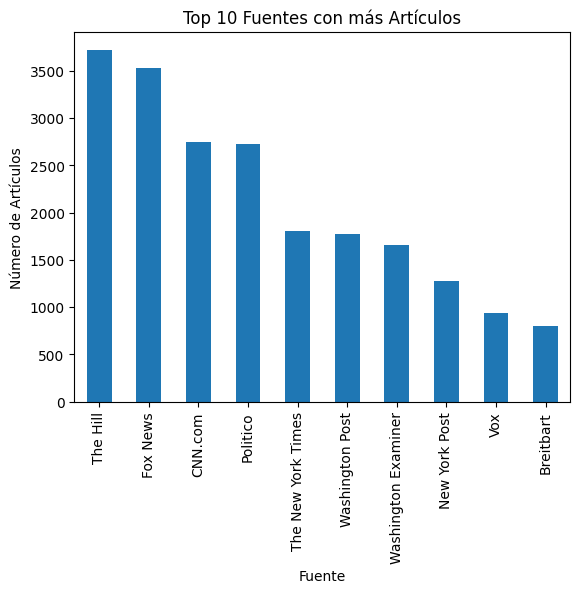

In [49]:
import matplotlib.pyplot as plt
top_sources = df['source'].value_counts().head(10)
top_sources.plot(kind='bar')
plt.title('Top 10 Fuentes con más Artículos')
plt.xlabel('Fuente')
plt.ylabel('Número de Artículos')
plt.show()

Se muestran cuáles son las 10 fuentes más activas en términos de cantidad de artículos.

### 26- Graficar la distribución de "story_position"

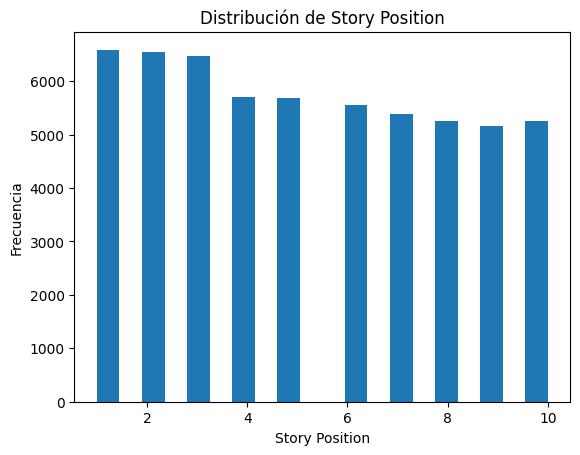

In [50]:
df['story_position'].plot(kind='hist', bins=20)
plt.title('Distribución de Story Position')
plt.xlabel('Story Position')
plt.ylabel('Frecuencia')
plt.show()

Este histograma es útil para obtener una visión general de cómo están distribuidos los datos en story_position y para identificar tendencias o patrones en esos datos.
(bins- es el numero de intervalos en los que se divide el rango de datos para crear el histograma)

### 27- Convertir la columna "storydate" a formato datetime

In [52]:
df['storydate'] = pd.to_datetime(df['storydate'])
df.dtypes

title                     object
url                       object
source                    object
time                      object
storydate         datetime64[ns]
query                     object
story_position             int64
panel_position           float64
domain                    object
category                  object
dtype: object

### 28- Crear una nueva columna con el año de "storydate"

In [58]:
# Para eliminar una columna de un DataFrame df = df.drop('year', axis=1)
df['year_storydate'] = df['storydate'].dt.year
df


,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown,2019
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown,2019
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown,2019
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown,2019
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown,2019
...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown,2019
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown,2019
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019


### 29- Crear una nueva columna con el mes de "storydate"

In [59]:
df['mes_storydate'] = df['storydate'].dt.month
df

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate,mes_storydate
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019,9


### 30- Convertir el DataFrame filtrado de "CNN.com" a formato JSON

In [66]:
import pandas as pd
import json

json_CNN = df_CNN.to_json(orient='records', lines=True)

# Cargar el JSON en una estructura de Python
data = [json.loads(line) for line in json_CNN.splitlines()]

print(json.dumps(data, indent=4))



[
    {
        "title": "Bernie Sanders stays on the stump after receiving stitches for head wound",
        "url": "https://www.cnn.com/2019/03/15/politics/bernie-sanders-stitches-south-carolina/index.html",
        "source": "CNN.com",
        "time": "1 hour ago",
        "storydate": 1552716000000,
        "query": "Bernie Sanders",
        "story_position": 1,
        "panel_position": 1.0,
        "domain": "www.cnn.com",
        "category": "Unknown",
        "year_storydate": 2019,
        "mes_storydate": 3
    },
    {
        "title": "Trump says he spoke with Putin about 'Russian hoax,' didn't warn him \nagainst 2020 election meddling",
        "url": "https://www.cnn.com/2019/05/03/politics/trump-putin-phone-call-mueller-report/index.html",
        "source": "CNN.com",
        "time": "4 hours ago",
        "storydate": 1556992800000,
        "query": "Donald Trump",
        "story_position": 9,
        "panel_position": 1.0,
        "domain": "www.cnn.com",
        "cate

### 31- Exportar el DataFrame filtrado de "CNN.com" a un archivo CSV

In [67]:
import pandas as pd


df_CNN.to_csv('df_CNN.csv', index=False)

# Verificar que el archivo se haya guardado correctamente
print("El archivo CSV 'df_CNN.csv' ha sido guardado.")


El archivo CSV 'df_CNN.csv' ha sido guardado.


### 32- Mostrar los artículos con la mayor "story_position" por fuente

In [68]:
import pandas as pd

max_story_position = df.groupby('source')['story_position'].idxmax()

# Seleccionar las filas con estos índices
result = df.loc[max_story_position]

result

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate,mes_storydate
51317,The HillTrump boasts of bigger El Paso crowd t...,https://thehill.com/homenews/administration/42...,,1 hour ago,2019-02-12 00:00:00,Donald Trump,8,1.0,thehill.com,Unknown,2019,2
22585,"On Palestine-Israel, Cory Booker and Kamala Ha...",https://972mag.com/black-palestine-democratic-...,+972 Magazine,2 days ago,2019-04-28 12:00:00,Cory Booker,7,1.0,972mag.com,Unknown,2019,4
1700,Mayor de Blasio launches new resources for hom...,https://1010wins.radio.com/articles/mayor-de-b...,1010 Wins - Radio.com,2 days ago,2019-10-09 20:00:00,Bill de Blasio,10,2.0,1010wins.radio.com,Unknown,2019,10
10841,Starbucks CEO to appear Sept. 27 at the Univer...,https://www.1011now.com/content/news/Starbucks...,1011 News,1 hour ago,2019-09-24 16:00:00,Howard Schultz,2,10.0,www.1011now.com,Unknown,2019,9
14773,Starbucks CEO to appear Sept. 27 at the Univer...,https://www.1011now.com/content/news/Starbucks...,1011Now,11 hours ago,2019-09-25 02:00:00,Howard Schultz,2,10.0,www.1011now.com,Unknown,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10732,"In a unique gesture, presidential candidate Ma...",https://thegrio.com/2019/07/17/marianne-willia...,theGrio,22 hours ago,2019-07-18 08:00:00,Marianne Williamson,10,1.0,thegrio.com,Unknown,2019,7
45194,VIDEO EXCLUSIVE: Democratic 2020 Presidential ...,https://upolitics.com/videos/video-exclusive-d...,uPolitics,2 days ago,2019-06-06 18:00:00,Andrew Yang,9,1.0,upolitics.com,Unknown,2019,6
25289,Bernie Sanders’ spiritual supporter turns 2020...,https://vtdigger.org/2019/03/24/bernie-sanders...,vtdigger.org,22 hours ago,2019-03-25 12:00:00,Marianne Williamson,1,2.0,vtdigger.org,Unknown,2019,3
7599,Rep. Seth Moulton Calls For Democratic Majorit...,https://www.wgbh.org/news/national-news/2019/0...,wgbh.org,1 day ago,2019-01-05 06:00:00,Seth Moulton,1,1.0,www.wgbh.org,Unknown,2019,1


### 33- Calcular el resumen estadístico de la columna "story_position"

In [69]:
df['story_position'].describe()

count    57618.000000
mean         5.249627
std          2.889002
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: story_position, dtype: float64

### 34- Calcular el conteo de valores únicos en la columna "query"

In [71]:
valores_unicos = df['query'].value_counts()
valores_unicos

query
Elizabeth Warren       2842
Pete Buttigieg         2816
Cory Booker            2773
Joe Biden              2720
Bernie Sanders         2719
Tulsi Gabbard          2713
Beto O Rourke          2707
Donald Trump           2704
Amy Klobuchar          2703
Kamala Harris          2694
Julian Castro          2596
Andrew Yang            2457
Marianne Williamson    2169
Steve Bullock          2097
Bill de Blasio         2040
Tom Steyer             2000
Jay Inslee             1950
Kirsten Gillibrand     1765
John Hickenlooper      1755
Michael Bloomberg      1606
Tim Ryan               1573
Michael Bennet         1542
Bill Weld              1448
Seth Moulton           1278
John Delaney           1026
Eric Swalwell           817
Howard Schultz          728
Mike Gravel             718
Deval Patrick           444
Wayne Messam            218
Name: count, dtype: int64

### 35- Calcular o contar los valores faltantes de cada columna

In [72]:
val_faltantes = df.isnull().sum()
val_faltantes

title              0
url                0
source             0
time               0
storydate          0
query              0
story_position     0
panel_position    33
domain             0
category           0
year_storydate     0
mes_storydate      0
dtype: int64

### 36- Filtrar filas donde falta algún dato

In [74]:
filas_con_faltantes = df[df.isnull().any(axis=1)]
filas_con_faltantes

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate,mes_storydate
2006,Elizabeth Warren Adds Kirsten Gillibrand and K...,https://www.glamour.com/story/elizabeth-warren...,Glamour,2 weeks ago,2019-12-30 20:00:00,Kirsten Gillibrand,3,NaN,www.glamour.com,Unknown,2019,12
2064,"Cory Booker, Michael Bennet and John Delaney w...",https://www.cnn.com/2019/12/17/politics/vermon...,CNN.com,2 days ago,2019-12-22 00:00:00,John Delaney,1,NaN,www.cnn.com,Unknown,2019,12
2274,Hickenlooper’s ethics hearing could be delayed...,https://www.denverpost.com/2019/12/05/john-hic...,The Denver Post,1 week ago,2019-12-14 18:00:00,John Hickenlooper,2,NaN,www.denverpost.com,Unknown,2019,12
4231,Exclusive: Washington Gov. Jay Inslee has a me...,https://www.salon.com/2019/11/27/exclusive-was...,Salon.com,2 weeks ago,2019-12-12 18:00:00,Jay Inslee,2,NaN,www.salon.com,Unknown,2019,12
7421,Senators Mitt Romney and Michael Bennet’s basi...,https://www.vox.com/future-perfect/2019/12/16/...,Vox,2 weeks ago,2019-12-30 10:00:00,Michael Bennet,3,NaN,www.vox.com,Unknown,2019,12
7483,All but Castro and Delaney file signatures in ...,https://www.richmond.com/news/virginia/all-but...,Richmond Times-Dispatch,2 days ago,2019-12-15 14:00:00,John Delaney,1,NaN,www.richmond.com,Unknown,2019,12
8759,John Delaney Would Like You to Know He’s Still...,https://gen.medium.com/john-delaney-would-like...,GEN - Medium,2 days ago,2019-12-22 00:00:00,John Delaney,2,NaN,gen.medium.com,Unknown,2019,12
10017,Bennet slams Democratic National Committee ove...,https://www.foxnews.com/politics/bennet-slams-...,Fox News,2 weeks ago,2019-12-19 12:00:00,Michael Bennet,6,NaN,www.foxnews.com,Unknown,2019,12
12287,Bennet slams Democratic National Committee ove...,https://www.foxnews.com/politics/bennet-slams-...,Fox News,3 weeks ago,2019-12-26 22:00:00,Michael Bennet,6,NaN,www.foxnews.com,Unknown,2019,12
13879,Opinion | Impeach Donald Trump,https://www.nytimes.com/interactive/2019/12/14...,The New York Times,10 hours ago,2019-12-14 20:00:00,Donald Trump,2,NaN,www.nytimes.com,Unknown,2019,12


### 37- Borrar la columna `category` del dataframe y guardarlo en otro dataframe

In [75]:
df_sin_category = df.drop(columns=['category'])
df_sin_category

,title,url,source,time,storydate,query,story_position,panel_position,domain,year_storydate,mes_storydate
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,2019,5
...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,2019,9


### 38- Filtrar filas donde la columna 'source' está vacía o es nula

In [76]:
filas_vacias = df[df['source'].isnull() | (df['source'] == '')]
filas_vacias

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate,mes_storydate
51317,The HillTrump boasts of bigger El Paso crowd t...,https://thehill.com/homenews/administration/42...,,1 hour ago,2019-02-12,Donald Trump,8,1.0,thehill.com,Unknown,2019,2
53805,Huffington PostBeto O'Rourke Positions Himself...,https://www.huffingtonpost.com/entry/beto-orou...,,1 hour ago,2019-02-12,Donald Trump,1,1.0,www.huffingtonpost.com,Unknown,2019,2


### 39-  Eliminar filas donde la columna 'source' está vacía o es nula

In [77]:
df_sin_nulos = df[df['source'].notnull() & (df['source'] != '')]
df_sin_nulos

,title,url,source,time,storydate,query,story_position,panel_position,domain,category,year_storydate,mes_storydate
0,Bloomberg cuts ties with company using prison ...,https://www.nbcnews.com/politics/2020-election...,NBC News,18 hours ago,2019-12-25 10:00:00,Michael Bloomberg,6,1.0,www.nbcnews.com,Unknown,2019,12
1,Democratic Candidates React to Michael Bloombe...,https://www.townandcountrymag.com/society/poli...,Town & Country Magazine,18 hours ago,2019-11-09 08:00:00,Amy Klobuchar,3,1.0,www.townandcountrymag.com,Unknown,2019,11
2,Sanders responds to de Blasio's invitation to ...,https://thehill.com/homenews/campaign/456579-s...,The Hill,15 hours ago,2019-08-08 06:00:00,Bernie Sanders,7,1.0,thehill.com,Unknown,2019,8
3,From Andrew Yang's 'No Tie' look to Bernie Buc...,https://www.cnbc.com/2019/08/02/election-2020-...,CNBC.com,1 day ago,2019-08-04 10:00:00,Andrew Yang,2,1.0,www.cnbc.com,Unknown,2019,8
4,Liberal billionaire Tom Steyer scolds Dems for...,https://www.foxnews.com/politics/liberal-billi...,Fox News,1 week ago,2019-05-28 00:00:00,Tom Steyer,5,2.0,www.foxnews.com,Unknown,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...
57613,NH Primary Source: Cory Booker's presidential ...,https://www.wmur.com/article/nh-primary-source...,WMUR.com,2 hours ago,2019-04-11 12:00:00,Cory Booker,4,1.0,www.wmur.com,Unknown,2019,4
57614,John Delaney Creates His Own Campaign Bounce,https://slate.com/news-and-politics/2019/11/jo...,Slate,1 month ago,2019-12-24 06:00:00,John Delaney,4,NaN,slate.com,Unknown,2019,12
57615,Mayor de Blasio calls for charges against driv...,https://abc7ny.com/mayor-calls-for-charges-aga...,abc7NY,2 days ago,2019-08-15 14:00:00,Bill de Blasio,10,1.0,abc7ny.com,Unknown,2019,8
57616,Elizabeth Warren Narrows Joe Biden Lead Among ...,https://www.investors.com/news/elizabeth-warre...,Investor's Business Daily,3 hours ago,2019-09-03 16:00:00,Joe Biden,10,1.0,www.investors.com,Unknown,2019,9


### 40- Calcular la media de la columna story_position para cada query

In [79]:
media_story_query = df_sin_nulos.groupby('query')['story_position'].mean()
media_story_query

query
Amy Klobuchar          5.485017
Andrew Yang            5.477004
Bernie Sanders         5.456418
Beto O Rourke          5.403399
Bill Weld              4.728591
Bill de Blasio         5.513235
Cory Booker            5.460512
Deval Patrick          5.191441
Donald Trump           5.485566
Elizabeth Warren       5.482407
Eric Swalwell          5.214198
Howard Schultz         4.776099
Jay Inslee             4.954359
Joe Biden              5.424632
John Delaney           4.452242
John Hickenlooper      4.911681
Julian Castro          5.374422
Kamala Harris          5.484781
Kirsten Gillibrand     5.284419
Marianne Williamson    5.144767
Michael Bennet         4.760052
Michael Bloomberg      4.865504
Mike Gravel            4.976323
Pete Buttigieg         5.392045
Seth Moulton           4.917058
Steve Bullock          5.042918
Tim Ryan               4.932613
Tom Steyer             5.032000
Tulsi Gabbard          5.509031
Wayne Messam           3.119266
Name: story_position, dtype: float